# Chapter 3: Engineering Optimization

---

**Prerequisites:**
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [ ]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt

from Chapter03_EngineeringOptimization_functions import (truss2x2,truss3x2,truss2x3,truss3x3,truss_10bar,
                                                        PlaneStressOC,
                                                         PlaneStressCantilever)

print('Setup complete!')

## Pick a truss example

In [ ]:
fem_model= truss3x3() 
fem_model.plot_truss()

## Solving and plotting deformed truss

In [ ]:
# Solve FEM for full design
d, valid = fem_model.solve()

print(f"Design valid? {valid}")
print(f"Max displacement: {abs(d).max():.3e} m")

# plot deformed truss
fem_model.plot_truss(displacements=d, 
                    title="Deformed Structure")


## Evaluating the metrics

In [ ]:
# Design constraints

metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)
fem_model.plot_truss(title="Initial Structure")

## Optimizing the truss 

In [ ]:
result = fem_model.optimize_areas(volume_fraction = 0.5)
metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)
fem_model.plot_truss(title="Optimized Structure")

## Plane stress example

In [ ]:

fea2d = PlaneStressCantilever(nx=60, ny=30,)
fea2d.plot_mesh()


## Solve Plane stress

In [ ]:

U, valid = fea2d.solve()
metrics = fea2d.evaluate_design()
fea2d.print_metrics(metrics)

fea2d.plot_displacement()

Iter  55: Compliance=0.3328, volume_fraction=0.5001, Change=0.0114
Iter  60: Compliance=0.3329, volume_fraction=0.4999, Change=0.0114
Iter  65: Compliance=0.3329, volume_fraction=0.4999, Change=0.0105
Iter  70: Compliance=0.3329, volume_fraction=0.5000, Change=0.0118
Iter  75: Compliance=0.3328, volume_fraction=0.5000, Change=0.0116
Iter  80: Compliance=0.3329, volume_fraction=0.4999, Change=0.0104
Iter  85: Compliance=0.3329, volume_fraction=0.5000, Change=0.0083
Iter  90: Compliance=0.3328, volume_fraction=0.5000, Change=0.0080
Iter  95: Compliance=0.3328, volume_fraction=0.5001, Change=0.0081


KeyboardInterrupt: 

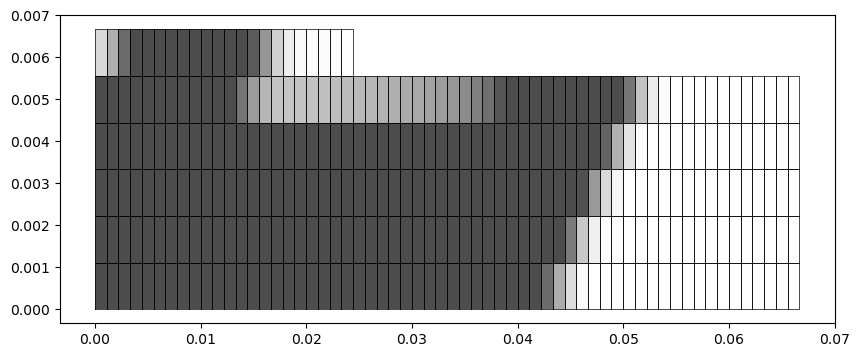

In [8]:
## Optimize 2D structure
toOC = PlaneStressOC(fea2d, volume_fraction = 0.5)
toOC.optimize()
fea2d.plot_mesh()